In [1]:
from scipy import stats

In [2]:
stats.norm.cdf(680,720,29)

0.0838995441777361

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
import matplotlib.pylot as plt

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [6]:
df1_glaxo  = pd.read_csv('glaxo_df.csv')

In [7]:
df2_beml  = pd.read_csv('beml_df.csv')

In [9]:
df2_beml.head()

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1134.60,-0.000881
1,2010-01-06,2010-01-06,1139.60,0.004407
2,2010-01-07,2010-01-07,1144.15,0.003993
3,2010-01-08,2010-01-08,1144.05,-0.000087
4,2010-01-11,2010-01-11,1137.00,-0.006162


In [10]:
df1_glaxo.tail()

,Date,Date.1,Close,gain
1733,2016-12-26,2016-12-26,2723.50,-0.001283
1734,2016-12-27,2016-12-27,2701.75,-0.007986
1735,2016-12-28,2016-12-28,2702.15,0.000148
1736,2016-12-29,2016-12-29,2727.90,0.009529
1737,2016-12-30,2016-12-30,2729.80,0.000697


In [11]:
beml_df  = df2_beml[['Date','Close']]
glaxo_df = df1_glaxo[['Date','Close']]


In [12]:
#Indexing 

glaxo_df  = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df   = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


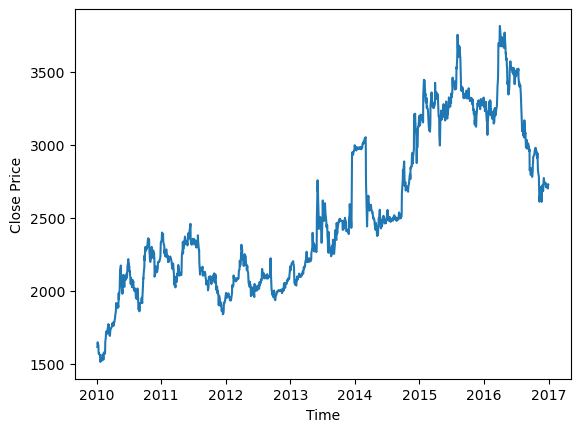

In [15]:
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

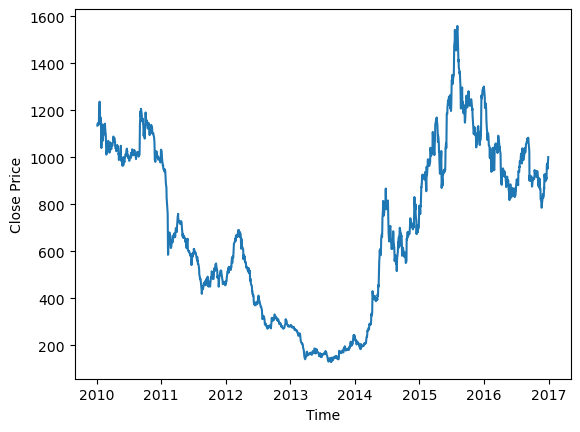

In [16]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [17]:
#Calculating gain

glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [18]:
beml_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,NaN
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [19]:
#Droppping first row since it is NaN

glaxo_df  = glaxo_df.dropna()
beml_df   = beml_df.dropna()

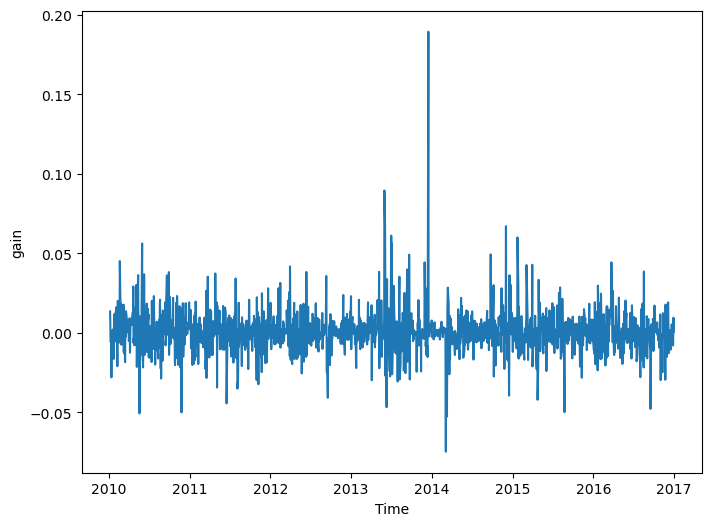

In [20]:
#Plot the gains

plt.figure(figsize  = (8,6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');



C:\Users\2138064\AppData\Local\Temp\1\ipykernel_4836\1858265696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glaxo_df.gain, label = 'Glaxo');


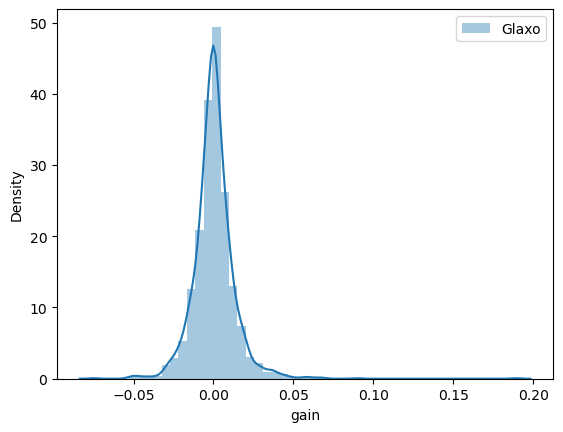

In [21]:
sns.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();


In [22]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [23]:
print('Mean:',round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean: 0.0003
Standard Deviation:  0.0264


In [24]:
#Probability of making 2% loss  in glaxo

stats.norm.cdf(-0.02, loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())


0.06353789851454293

In [25]:
#Probability of making 2% gain in glaxo

1 - stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())


0.07112572432274356

In [27]:
#Probability of making 2% loss  in beml

stats.norm.cdf(-0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.2216179428118762

In [28]:
#Probability of making 2% gain  in beml

1 - stats.norm.cdf(0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.2277706340605088